In [1]:
# upload data and clean it 
import pandas as pd

# Load the data
df = pd.read_csv('Dataset.txt', header=None, names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_category','attack_type', 'difficulty_level'])

# # Drop any null values
# df.dropna(inplace=True)

# # Convert categorical variables to one-hot encoding
# cat_vars = ['protocol_type', 'service', 'flag']
# for var in cat_vars:
#     cat_list = pd.get_dummies(df[var], prefix=var)
#     df = df.join(cat_list)

# # Remove original categorical variables
# df.drop(cat_vars, axis=1, inplace=False)

df.head()


C:\Users\mehmo\AppData\Local\Temp\ipykernel_3152\4031610612.py:5: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.txt', header=None, names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rat

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_type,difficulty_level
0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,NaN
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
2,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,NaN
4,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN


In [3]:
df.shape


(125974, 44)

In [4]:
df['attack_category'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
attack_category        1
Name: attack_category, dtype: int64

In [5]:
#df.dtypes

In [6]:
# data preprocessing 
df.isnull().sum()

duration                            0
protocol_type                       0
service                             0
flag                                0
src_bytes                           0
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [7]:
#categorial values 
#cat_vars = ['protocol_type', 'service', 'flag']
# Find categorical variables
cat_vars = df.select_dtypes(include=['object']).columns
print(cat_vars)

# exluding the last one 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'attack_type'],
      dtype='object')


In [8]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

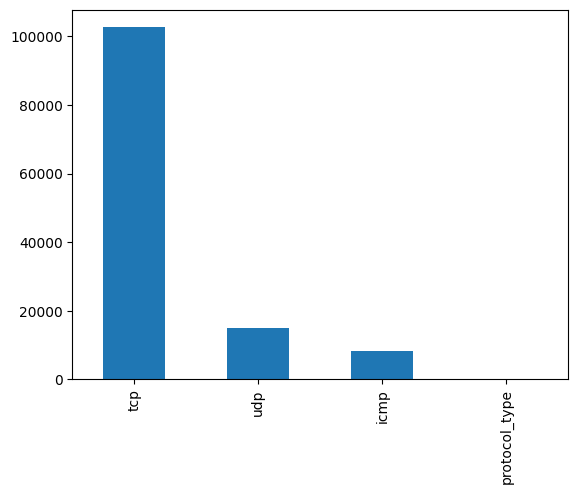

In [9]:
bar_graph('protocol_type')

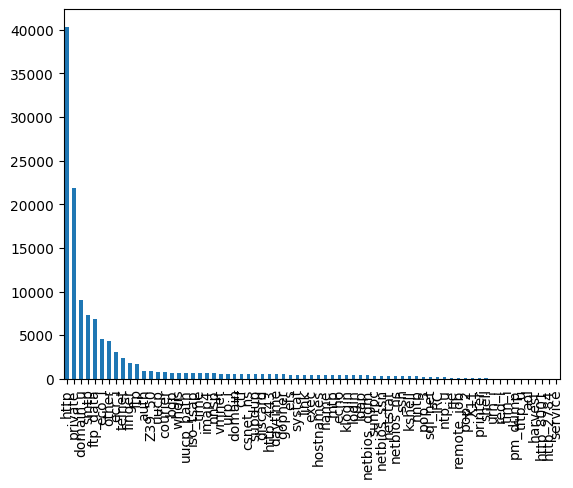

In [10]:
bar_graph('service')

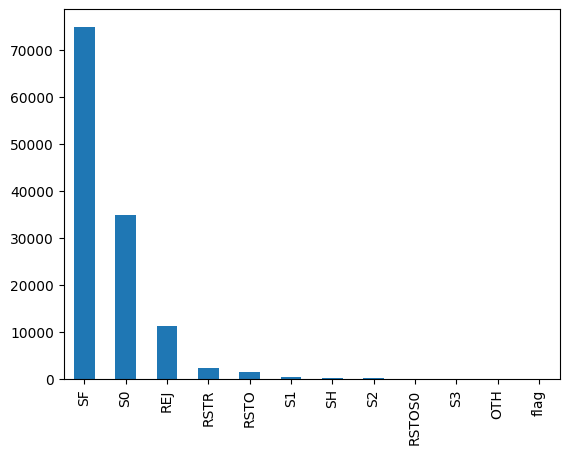

In [11]:
bar_graph('flag')

In [12]:
#df.columns

In [13]:
# df = df.rename(columns={"C": "D"})
# rename the attack varialble later !!!

#df['attack_category'].value_counts()

In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_type,difficulty_level
0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,NaN
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
2,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,NaN
4,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN


In [15]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)




In [16]:
#df.shape

In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_type,difficulty_level
0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,NaN
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.05,0.00,normal,20,NaN
2,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,normal,15,NaN
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,0.00,0.00,neptune,19,NaN
4,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.00,0.01,normal,21,NaN


In [18]:
df.columns 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_category',
       'attack_type', 'difficulty_level'],
      dtype='object')

In [19]:
df['protocol_type'].value_counts()

tcp              102689
udp               14993
icmp               8291
protocol_type         1
Name: protocol_type, dtype: int64

In [20]:
#protocol_type feature mapping

pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [21]:
df['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
flag          1
Name: flag, dtype: int64

In [22]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [23]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_type,difficulty_level
0,duration,NaN,service,NaN,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,NaN
1,0,1.0,ftp_data,0.0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.05,0.00,normal,20,NaN
2,0,2.0,other,0.0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,normal,15,NaN
3,0,1.0,private,1.0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,0.00,0.00,neptune,19,NaN
4,0,1.0,http,0.0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.00,0.01,normal,21,NaN


In [24]:
#df.columns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time 

In [26]:
print(df.dtypes)

duration                        object
protocol_type                  float64
service                         object
flag                           float64
src_bytes                       object
dst_bytes                       object
land                            object
wrong_fragment                  object
urgent                          object
hot                             object
num_failed_logins               object
logged_in                       object
num_compromised                 object
root_shell                      object
su_attempted                    object
num_file_creations              object
num_shells                      object
num_access_files                object
num_outbound_cmds               object
is_host_login                   object
is_guest_login                  object
count                           object
srv_count                       object
serror_rate                     object
rerror_rate                     object
same_srv_rate            

In [27]:
df.columns 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_category',
       'attack_type', 'difficulty_level'],
      dtype='object')

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time

# Separate features and target variable
X = df.drop('attack_type', axis=1)
Y = df['attack_category']

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Train the model
model2 = DecisionTreeClassifier()
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

# Print the training time
print('Training time:', end_time - start_time)


ValueError: could not convert string to float: 'duration'

In [ ]:
# df = df.drop(['attack_type',], axis=1)
# print(df.shape)

# # Target variable and train set
# Y = df[['attack_category']]
# X = df.drop(['attack_category',], axis=1)

# sc = MinMaxScaler()
# X = sc.fit_transform(X)

# # Split test and train data 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# print(X_train.shape, X_test.shape)
# print(Y_train.shape, Y_test.shape)

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time



# Convert non-numeric columns to appropriate data types
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['attack_type'] = df['attack_type'].astype('category')

df.dropna('duplicate')


# Convert categorical columns to one-hot encoded numerical columns
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag', 'attack_type',])

# Separate features and target variable
X = df.drop('attack_category', axis=1)
Y = df['attack_category']

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Train the model
model2 = DecisionTreeClassifier()
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

# Print the training time
print('Training time:', end_time - start_time)


C:\Users\mehmo\AppData\Local\Temp\ipykernel_3228\2649230404.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna('duplicate')


ValueError: No axis named duplicate for object type DataFrame